<a href="https://colab.research.google.com/github/Shakibap/Data-Science-Portfo/blob/Data-Science/House_Prices_Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
#files.upload()

Saving test.csv to test.csv


{'test.csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition\n1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA

In [92]:
X_full = pd.read_csv("train.csv", index_col='Id')
X_valid_full = pd.read_csv("test.csv", index_col='Id')

In [ ]:
X_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
X_full.shape

(1460, 80)

In [ ]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [93]:
# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice

# **Data Cleaning and Preprocessing**

# Categorical Data

**filling missing values**

In [94]:
# based on data description the 'nan' in these columns means 'no'
X_full.Alley.fillna('No_access', inplace=True)
X_full.BsmtQual.fillna('No_Basement', inplace=True)
X_full.BsmtCond.fillna('No_Basement', inplace=True)
X_full.BsmtExposure.fillna('No_Basement', inplace=True)
X_full.BsmtFinType1.fillna('No_Basement', inplace=True)
X_full.BsmtFinType2.fillna('No_Basement', inplace=True)
X_full.FireplaceQu.fillna('No_Fireplace', inplace=True)
X_full.GarageType.fillna('No_Garage', inplace=True)
X_full.GarageFinish.fillna('No_Garage', inplace=True)
X_full.GarageQual.fillna('No_Garage', inplace=True)
X_full.GarageCond.fillna('No_Garage', inplace=True)
X_full.PoolQC.fillna('No_Pool', inplace=True)
X_full.Fence.fillna('No_Fence', inplace=True)
X_full.MiscFeature.fillna('None', inplace=True)

X_valid_full.Alley.fillna('No_access', inplace=True)
X_valid_full.BsmtQual.fillna('No_Basement', inplace=True)
X_valid_full.BsmtCond.fillna('No_Basement', inplace=True)
X_valid_full.BsmtExposure.fillna('No_Basement', inplace=True)
X_valid_full.BsmtFinType1.fillna('No_Basement', inplace=True)
X_valid_full.BsmtFinType2.fillna('No_Basement', inplace=True)
X_valid_full.FireplaceQu.fillna('No_Fireplace', inplace=True)
X_valid_full.GarageType.fillna('No_Garage', inplace=True)
X_valid_full.GarageFinish.fillna('No_Garage', inplace=True)
X_valid_full.GarageQual.fillna('No_Garage', inplace=True)
X_valid_full.GarageCond.fillna('No_Garage', inplace=True)
X_valid_full.PoolQC.fillna('No_Pool', inplace=True)
X_valid_full.Fence.fillna('No_Fence', inplace=True)
X_valid_full.MiscFeature.fillna('None', inplace=True)

In [95]:
# separating numerical and categorical columns
num_cols = [cname for cname in X_full.columns if 
                X_full[cname].dtype in ['int64', 'float64']]

cat_cols = [cname for cname in X_full.columns if 
                    X_full[cname].dtype == "object"]

In [96]:
# specifing the columns with null values
X_cat_null = pd.DataFrame(X_full[cat_cols].isnull().sum(), columns=['Num'])
X_valid_cat_null = pd.DataFrame(X_valid_full[cat_cols].isnull().sum(), columns=['Num'])

In [97]:
X_cat_null[X_cat_null.Num>0]

,Num
MasVnrType,8
Electrical,1


In [98]:
X_valid_cat_null[X_valid_cat_null.Num>0]

,Num
MSZoning,4
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,16
KitchenQual,1
Functional,2
SaleType,1


In [99]:
# filling null data points for categorical columns
imputer = SimpleImputer(strategy='most_frequent')
X_full.loc[: , cat_cols] = imputer.fit_transform(X_full[cat_cols])
X_valid_full.loc[: , cat_cols] = imputer.fit_transform(X_valid_full[cat_cols])

**encoding categorical columns**

In [100]:
labelencoder = LabelEncoder()

In [101]:
# based on correlation of categorical features with target column, it is been determined which method should be used for each column
simple_encodings = []
advanced_encodings = []
for x in cat_cols:
    df1 = X_full.loc[:, (x, 'SalePrice')]
    df1[x] = labelencoder.fit_transform(df1[x])
    corr1 = df1.corr()
    max1 = corr1.SalePrice[corr1.SalePrice<1].abs().max()

    df2 = X_full.loc[:, (x, 'SalePrice')]
    df2 = pd.get_dummies(df2)
    corr2 = df2.corr()
    max2 = corr2.SalePrice[corr2.SalePrice<1].abs().max()

    if max1 > max2:
      simple_encodings.append(x)
    else:
      advanced_encodings.append(x)

In [102]:
# encoding the categorical columns that label encoding is better for them
for x in simple_encodings:
  X_full[x] = labelencoder.fit_transform(X_full[x])
  X_valid_full[x] = labelencoder.fit_transform(X_valid_full[x])

In [103]:
simple_encodings

['LandSlope',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'Heating',
 'KitchenQual',
 'GarageType',
 'GarageFinish']

In [104]:
# 'OverallCond' column is inherently a categorical feature that is better to encode the items separately 
X_full.OverallCond = X_full.OverallCond.astype('object')
X_valid_full.OverallCond = X_valid_full.OverallCond.astype('object')

In [105]:
# encoding the rest of the categorical features
X_full = pd.get_dummies(X_full)
X_valid_full = pd.get_dummies(X_valid_full)

**cleaning some of the columns**

In [106]:
# removing and arranging the silmilar columns for No_Basement and keeping one of them
X_full['No_Basement'] = X_full['BsmtCond_No_Basement']
X_valid_full['No_Basement'] = X_valid_full['BsmtCond_No_Basement']

X_full.drop(columns=['BsmtFinType1_No_Basement', 'BsmtFinType2_No_Basement', 'BsmtCond_No_Basement'], inplace=True)
X_valid_full.drop(columns=['BsmtFinType1_No_Basement', 'BsmtFinType2_No_Basement', 'BsmtCond_No_Basement'], inplace=True)

In [107]:
#removing and arranging the silmilar columns for No_Garage and keeping one of them
X_full['No_Garage'] = X_full['GarageQual_No_Garage']
X_full.drop(columns=['GarageQual_No_Garage', 'GarageCond_No_Garage'], inplace=True)

X_valid_full['No_Garage'] = X_valid_full['GarageQual_No_Garage']
X_valid_full.drop(columns=['GarageQual_No_Garage', 'GarageCond_No_Garage'], inplace=True)

In [108]:
#arranging the No_Fireplace column by changing the name
X_full['No_Fireplace'] = X_full['FireplaceQu_No_Fireplace']
X_full.drop(columns='FireplaceQu_No_Fireplace', inplace=True)

X_valid_full['No_Fireplace'] = X_valid_full['FireplaceQu_No_Fireplace']
X_valid_full.drop(columns='FireplaceQu_No_Fireplace', inplace=True)

In [109]:
#arranging the No_Pool column by changing the name
X_full['No_Pool'] = X_full['PoolQC_No_Pool']
X_full.drop(columns='PoolQC_No_Pool', inplace=True)

X_valid_full['No_Pool'] = X_valid_full['PoolQC_No_Pool']
X_valid_full.drop(columns='PoolQC_No_Pool', inplace=True)

In [110]:
#arranging the No_Fence column by changing the name
X_full['No_Fence'] = X_full['Fence_No_Fence']
X_full.drop(columns='Fence_No_Fence', inplace=True)

X_valid_full['No_Fence'] = X_valid_full['Fence_No_Fence']
X_valid_full.drop(columns='Fence_No_Fence', inplace=True)

In [111]:
#arranging the No_MasVnr column by changing the name
X_full['No_MasVnr'] = X_full['MasVnrType_None']
X_full.drop(columns='MasVnrType_None', inplace=True)

X_valid_full['No_MasVnr'] = X_valid_full['MasVnrType_None']
X_valid_full.drop(columns='MasVnrType_None', inplace=True)


# Numerical Data

**filling missing values**

In [112]:
# specifing the numerical columns with null values
X_num_null = pd.DataFrame(X_full.isnull().sum(), columns=['Num'])
X_valid_num_null = pd.DataFrame(X_valid_full.isnull().sum(), columns=['Num'])

In [113]:
X_num_null[X_num_null.Num>0]

,Num
LotFrontage,259
MasVnrArea,8
GarageYrBlt,81


In [114]:
X_valid_num_null[X_valid_num_null.Num>0]

,Num
LotFrontage,227
MasVnrArea,15
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1
TotalBsmtSF,1
BsmtFullBath,2
BsmtHalfBath,2
GarageYrBlt,78
GarageCars,1


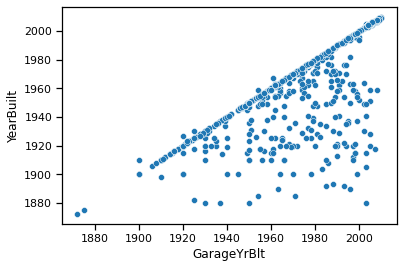

In [233]:
# It seems the closest data to 'GarageYrBlt' column is 'GarageYearBuilt'
sns.set_context('notebook')
sns.scatterplot(data=X_full, x='GarageYrBlt', y='YearBuilt')

In [116]:
# finding the percent of 'GarageYearBuilt' values tha are equal to 'YearBuilt' values
X_full[X_full.GarageYrBlt == X_full.YearBuilt].YearBuilt.count() / X_full.shape[0]

0.7458904109589041

In [117]:
# about 75 percent of data of the two columns are the same, so the null values of 'GarageYearBuilt' are filling with the values of 'YearBuilt
X_full['GarageYrBlt'].fillna(X_full['YearBuilt'], inplace=True)
X_valid_full['GarageYrBlt'].fillna(X_valid_full['YearBuilt'], inplace=True)

In [118]:
# filling the rest of the numerical columns with median data
imputer = SimpleImputer(strategy='median')
X_full.loc[: , :] = imputer.fit_transform(X_full)
X_valid_full.loc[: , :] = imputer.fit_transform(X_valid_full)

In [119]:
X_full.isnull().sum().sum(), X_valid_full.isnull().sum().sum()

(0, 0)

In [120]:
# selecting the common features
features = X_full.columns & X_valid_full.columns
X_full = X_full.loc[:, features]
X_valid_full = X_valid_full.loc[:, features]

# Feature Engineering

**combining features**

In [121]:
# refreshing the numerical columns list
num_columns = num_cols

In [122]:
num_columns =  num_columns + simple_encodings

In [123]:
num_columns.remove('OverallCond')

In [125]:
# finding the correlation between numerical features and target to to get some intuition to combine the features
X_full['SalePrice'] = y
corr = X_full[num_columns].corr()

In [126]:
corr_DF = pd.DataFrame(corr.SalePrice)
sorted_corr = corr_DF.sort_values(by='SalePrice', ascending=False)
sorted_corr

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


Text(0.5, 0, 'GrLivArea & TotalBsmtSF')

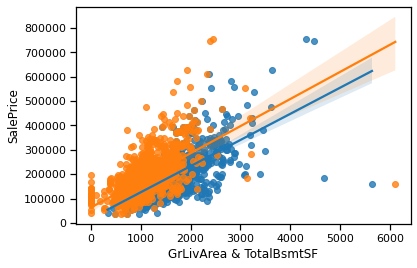

In [234]:
sns.regplot(data = X_full, x = 'GrLivArea', y='SalePrice')
sns.regplot(data = X_full, x = 'TotalBsmtSF', y='SalePrice')
plt.xlabel('GrLivArea & TotalBsmtSF')

Text(0.5, 0, 'YearBuilt & YearRemodAdd')

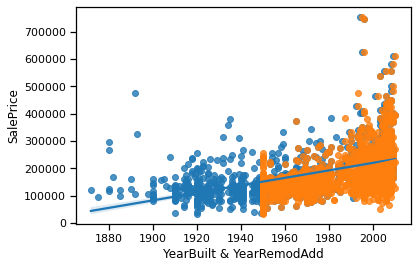

In [235]:
sns.regplot(data = X_full, x = 'YearBuilt', y='SalePrice')
sns.regplot(data = X_full, x = 'YearRemodAdd', y='SalePrice')
plt.xlabel('YearBuilt & YearRemodAdd')

Text(0.5, 0, 'FullBath & Fireplaces')

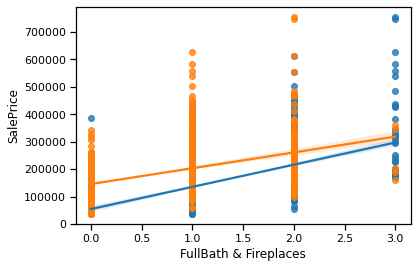

In [236]:
sns.regplot(data = X_full, x = 'FullBath', y='SalePrice')
sns.regplot(data = X_full, x = 'Fireplaces', y='SalePrice')
plt.xlabel('FullBath & Fireplaces')

Text(0.5, 0, 'MasVnrArea & GarageArea')

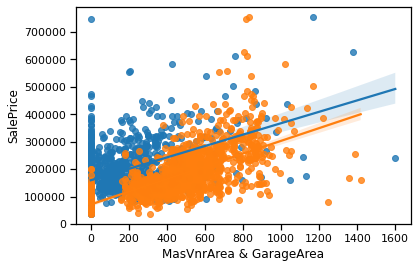

In [237]:
sns.regplot(data = X_full, x = 'MasVnrArea', y='SalePrice')
sns.regplot(data = X_full, x = 'GarageArea', y='SalePrice')
plt.xlabel('MasVnrArea & GarageArea')

Text(0.5, 0, 'WoodDeckSF & OpenPorchSF')

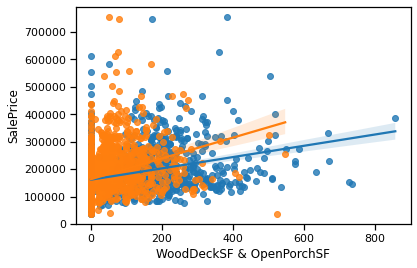

In [238]:
sns.regplot(data = X_full, x = 'WoodDeckSF', y='SalePrice')
sns.regplot(data = X_full, x = 'OpenPorchSF', y='SalePrice')
plt.xlabel('WoodDeckSF & OpenPorchSF')

Text(0.5, 0, 'ScreenPorch & 3SsnPorch')

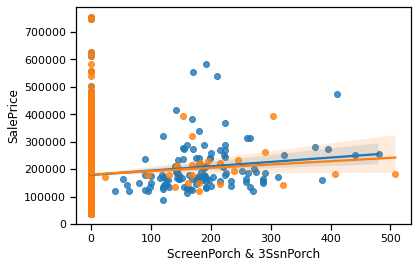

In [239]:
sns.regplot(data = X_full, x = 'ScreenPorch', y='SalePrice')
sns.regplot(data = X_full, x = '3SsnPorch', y='SalePrice')
plt.xlabel('ScreenPorch & 3SsnPorch')

Text(0.5, 0, 'LandSlope & HalfBath')

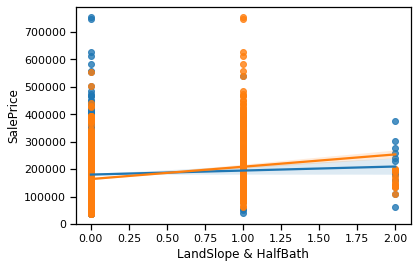

In [240]:
sns.regplot(data = X_full, x = 'LandSlope', y='SalePrice')
sns.regplot(data = X_full, x = 'HalfBath', y='SalePrice')

plt.xlabel('LandSlope & HalfBath')

In [180]:
X = X_full.copy()
X_valid = X_valid_full.copy()

In [181]:
X['GrLivArea&TotalBsmtSF'] = X['GrLivArea'] + X['TotalBsmtSF']
X_valid['GrLivArea&TotalBsmtSF'] = X_valid['GrLivArea'] + X_valid['TotalBsmtSF']

X.drop(columns=['GrLivArea', 'TotalBsmtSF'], inplace=True)
X_valid.drop(columns=['GrLivArea', 'TotalBsmtSF'], inplace=True)

In [182]:
X['YearBuilt&YearRemodAdd'] = X['YearBuilt'] + X['YearRemodAdd']
X_valid['YearBuilt&YearRemodAdd'] = X_valid['YearBuilt'] + X_valid['YearRemodAdd']

X.drop(columns=['YearBuilt', 'YearRemodAdd'], inplace=True)
X_valid.drop(columns=['YearBuilt', 'YearRemodAdd'], inplace=True)

In [183]:
X['FullBath&Fireplaces'] = X['Fireplaces'] + X['FullBath']
X_valid['FullBath&Fireplaces'] = X_valid['Fireplaces'] + X_valid['FullBath']

X.drop(columns=['Fireplaces', 'FullBath'], inplace=True)
X_valid.drop(columns=['Fireplaces', 'FullBath'], inplace=True)

In [184]:
X['GarageArae&MasVnrArea'] = X['GarageArea'] + X['MasVnrArea']
X_valid['GarageArae&MasVnrArea'] = X_valid['GarageArea'] + X_valid['MasVnrArea']

X.drop(columns=['GarageArea', 'MasVnrArea'], inplace=True)
X_valid.drop(columns=['GarageArea', 'MasVnrArea'], inplace=True)

In [185]:
X['WoodDeckSF&OpenPorchSF'] = X['WoodDeckSF'] + X['OpenPorchSF']
X_valid['WoodDeckSF&OpenPorchSF'] = X_valid['WoodDeckSF'] + X_valid['OpenPorchSF']

X.drop(columns=['WoodDeckSF', 'OpenPorchSF'], inplace=True)
X_valid.drop(columns=['WoodDeckSF', 'OpenPorchSF'], inplace=True)

In [186]:
X['ScreenPorch&3SsnPorch'] = X['ScreenPorch'] + X['3SsnPorch'] 
X_valid['ScreenPorch&3SsnPorch'] = X_valid['ScreenPorch'] + X_valid['3SsnPorch']

X.drop(columns=['ScreenPorch', '3SsnPorch'], inplace=True)
X_valid.drop(columns=['ScreenPorch', '3SsnPorch'], inplace=True)

In [187]:
X['LandSlope&halfBath'] = X['LandSlope'] + X['HalfBath']
X_valid['LandSlope&HalfBath'] = X_valid['LandSlope'] + X_valid['HalfBath'] 

X.drop(columns=['LandSlope', 'HalfBath'], inplace=True)
X_valid.drop(columns=['LandSlope', 'HalfBath'], inplace=True)

# **Modeling**

In [188]:
X.drop('SalePrice', axis=1, inplace=True)

In [189]:
# Break off test set from training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [190]:
model = GradientBoostingRegressor(learning_rate=0.076, min_samples_leaf=2, n_estimators=500, random_state=42)
model.fit(X_train, y_train)

preds_train = model.predict(X_train)
preds_test = model.predict(X_test)
print('MAE:', mean_absolute_error(y_train, preds_train))
print('MAE:', mean_absolute_error(y_test, preds_test))

MAE: 4986.6331560271055
MAE: 13866.36564200753


#Final Model

In [221]:
model = GradientBoostingRegressor(learning_rate=0.076, min_samples_leaf=2, n_estimators=500, random_state=42)
model.fit(X, y)

GradientBoostingRegressor(learning_rate=0.076, min_samples_leaf=2,
                          n_estimators=500, random_state=42)

*The Final Model was tested by validation data in Kaggle and the Mean_Absolute_Error was about 14100*